## Training XGBoost Regression

- **General Parameters**:

    - **booster** = [*gbtree*, *gblinear*, *dart*]. The booster parameter in XGBoost is crucial for defining the type of model you will train. It has three settings:
        - **gbtree**: uses tree-based models for each boosting iteration. Default and most common choice, works well across a wide range of datasets;
        - **gblinear**: employs linear models. This is preferable for datasets where relationships between variables are well approximated linearly;
        - **dart**: implements DART --*Dropouts meet Multiple Additive Regression Trees*--, which helps prevent overfitting by employing a dropout approach during training. https://xgboosting.com/configure-xgboost-booster-parameter/
          
    - **devise** = cpu

    - **verbosity** = 2 (info)

    - **nthread** = this is number of parallel threads used to run XGBoost.

- **Parameters for Tree Booster**:

    - **objective** = the objective parameter is the loss function to be minimized. For example, *"reg:squarederror"* for regression problem. https://xgboosting.com/configure-xgboost-objective-parameter/
  
    - **eval_metric** = the eval_metric parameter is the metric used for monitoring performance during training and for early stopping. For example *"rmse"* for root mean square error. It is important to choose the appropriate metric for the problem at hand. https://xgboosting.com/configure-xgboost-eval_metric-parameter/

    - **early_stopping_rounds**: the early_stopping_rounds parameter specifies the number of rounds (iterations) to continue training after the last improvement in the model's performance on the validation set. Early stopping helps prevent overfitting by terminating training when the model’s performance on unseen data (validation set) stops improving. This technique also saves computational resources by avoiding unnecessary iterations. https://xgboosting.com/configure-xgboost-early_stopping_rounds-parameter/
   
    - **n_estimators** [default=100]= the n_estimators parameter controls the number of trees in the model. Increasing this value generally improves model performance, but can also lead to overfitting. A common value for this parameter is between 50 and 1000. https://xgboosting.com/configure-xgboost-n_estimators-parameter/

    - **learning_rate (eta)** [default=0.3] = the learning rate controls the step size at which the optimizer makes updates to the weights. A smaller eta value results in slower but more accurate updates, while a larger eta value results in faster but less accurate updates. However, setting a too small eta value can lead to slow convergence and a too high value can lead to underfitting. Range of $[0, 1]$. https://xgboosting.com/configure-xgboost-learning_rate-parameter/

    - **min_split_loss (gamma)** [default=0]= the min_split_loss parameter in XGBoost is an alias for the gamma parameter, which controls the minimum loss reduction required to make a split on a leaf node of the tree. By adjusting min_split_loss, you can influence the model’s complexity and its ability to generalize. Range of $[0, \infty]$. https://xgboosting.com/configure-xgboost-gamma-parameter/

    - **max_depth** [default=6] = the max_depth parameter controls the maximum depth of the trees in the model. A larger max_depth value results in more complex models, which can lead to overfitting. A smaller max_depth value results in simpler models, which can lead to underfitting. max_depth accepts positive integer values. Range of $[0, \infty]$. **Note**: **exact** tree method requires non-zero value. https://xgboosting.com/configure-xgboost-max_depth-parameter/

    - **min_child_weight** [default=1] = the min_child_weight parameter determines the minimum sum of instance weight (hessian) needed in a child node for a split to be made. It is a regularization parameter that can help control overfitting by preventing the creation of overly complex trees. Range of $[0, \infty]$. https://xgboosting.com/configure-xgboost-min_child_weight-parameter/

    - **max_delta_step** [default=0] = the max_delta_step parameter determines the maximum delta step allowed for each tree's weight estimation during the model's training process. It can help make the model more conservative and robust to outliers by limiting the weight updates. Range of $[0, \infty]$ and typical values of $[1,10]$ might help control the update.. **Higher** max_delta_step values allow for larger weight updates, potentially making the model more sensitive to extreme weights and outliers. This can be beneficial if the model is underfitting or struggling to capture complex patterns in the data. **Lower** max_delta_step values limit the weight updates, making the model more conservative and robust to outliers. This can be useful if the model is overly sensitive to noisy data or outliers. https://xgboosting.com/configure-xgboost-max_delta_step-parameter/

    - **subsample** [default=1] = The subsample parameter controls the fraction of observations used for each tree. A smaller subsample value results in smaller and less complex models, which can help prevent overfitting. A larger subsample value results in larger and more complex models, which can lead to overfitting. subsample accepts values between 0 and 1, with 1 meaning that all observations are used for each tree. It is common to set this value between 0.5 and 1. Range of $(0,1]$. https://xgboosting.com/configure-xgboost-subsample-parameter/

    - **tree_method** = [*auto*, *exact*, *approx*, *hist*] the “tree_method” parameter in XGBoost specifies the algorithm used to construct the trees. It has several options, including:
        - **auto**: XGBoost selects the most appropriate method based on the dataset;
        - **exact**: utilizes an exact greedy algorithm. Best for small to medium datasets where precision is paramount. **Note**: use **"exact"** when your dataset is not extremely large and model accuracy is the critical factor;
        - **approx**: employs a histogram-based approximation of the greedy algorithm. Ideal for larger datasets to balance performance and speed;
        - **hist**: uses a faster histogram optimized algorithm, suitable for most datasets due to its effective balance of memory usage and speed.
    https://xgboosting.com/configure-xgboost-tree_method-parameter/

    - **sampling_method** = [*uniform*, *gradient_based*] the sampling_method parameter in XGBoost plays a critical role in how training data is sampled when building trees. Proper configuration of this parameter can lead to improvements in training speed and model accuracy, making it a vital aspect for fine-tuning your XGBoost models. **Note**: It can only be changed to *'gradient_based'* if tree_method is set to *'hist'* and device is set to *'cuda'*. https://xgboosting.com/configure-xgboost-sampling_method-parameter/
 
        - **uniform**: this method samples instances randomly and equally, giving each instance the same probability of being selected. It is straightforward and can be effective for datasets where every sample is similarly important;
        - **gradient_based**: this approach prioritizes instances based on the magnitude of their gradients, meaning instances with higher errors --and thus steeper gradients-- are more likely to be selected. This method is particularly useful for complex datasets with imbalanced classes or significant noise. **Note**: gradient-based sampling is only support by **GPU Hist**.
        
    - **colsample_bytree** [default=1] = the colsample_bytree parameter controls the fraction of features used for each tree. In other words, colsample_bytree defines what percentage of features (columns) will be used for building each tree. A smaller colsample_bytree value results in smaller and less complex models, which can help prevent overfitting. A larger colsample_bytree value results in larger and more complex models, which can lead to overfitting. colsample_bytree accepts values between 0 and 1, with 1 meaning that all features are available for each tree. It is common to set this value between 0.5 and 1. Range of $(0, 1]$. https://xgboosting.com/configure-xgboost-colsample_bytree-parameter/
 
    - **colsample_bylevel** [default=1] = the colsample_bylevel parameter determines the fraction of features (columns) to be randomly sampled at each level (depth) of the tree during the model’s training process. It is a regularization technique that can help prevent overfitting by reducing the number of features each level of the tree can access, thus encouraging the model to rely on different subsets of features at different depths. Range of $(0, 1]$. https://xgboosting.com/configure-xgboost-colsample_bylevel-parameter/

    - **colsample_bynode** [default=1] = the colsample_bynode parameter determines the fraction of features (columns) to be randomly sampled at each node of the tree during the model’s training process. It is a regularization technique that can help prevent overfitting by reducing the number of features each node of the tree can access, thus encouraging the model to rely on different subsets of features at different nodes. Range of $(0, 1]$. https://xgboosting.com/configure-xgboost-colsample_bynode-parameter/

    - **lambda (reg_lambda)** [default=1] = the lambda parameter is the L2 regularization term on weights. Larger values means more conservative model, it helps to reduce overfitting by adding a penalty term to the loss function.  By adjusting lambda, you can influence the model’s complexity and its ability to generalize. It is common to start with a relatively small value, such as lambda = 1 and increase it until the performance on the validation set stops improving. Range of $[0, \infty]$. https://xgboosting.com/configure-xgboost-lambda-parameter/

    - **alpha (reg_alpha)** [default=0] = the alpha parameter is the L1 regularization term on weights. Larger values means more conservative model, it helps to reduce overfitting by adding a penalty term to the loss function. It is common to start with a relatively small value, such as alpha = 0 and increase it until the performance on the validation set stops improving. Range of $[0, \infty]$. https://xgboosting.com/configure-xgboost-alpha-parameter/

    - **grow_policy** = [*depthwise*, *lossguide*] the grow_policy parameter in XGBoost determines how the trees are grown during the training process. By setting this parameter, you can influence the structure of the resulting trees and potentially improve the model's performance. https://xgboosting.com/configure-xgboost-grow_policy-parameter/
        - **depthwise**: this policy grows the trees depth-wise, meaning it prioritizes achieving the maximum depth specified by the max_depth parameter. This growth policy tends to create deeper, more complex trees;
        - **lossguide**: the tree growth process continues until the loss reduction is below a certain threshold or other stopping criteria are met. This growth policy often results in shallower trees compared to “depthwise”. 

    - **importance_type** = [*gain*, *weight*, *cover*, *total_gain*, *total_cover*] the importance_type parameter in XGBoost determines the method used to calculate feature importance scores, which are crucial for interpreting the model's decisions. **Note**: Use **gain** or **total_gain** when you want to understand the contribution of features to the model's performance. Features with higher gain scores have a more significant impact on the model's predictions. Use **weight** or **cover** when you want to identify the most frequently used or broadly applicable features. Features with higher weight or cover scores are used more often in the model's decision-making process. https://xgboosting.com/configure-xgboost-importance_type-parameter/
 
         - **gain** (default): calculates the average gain of splits that use the feature. Gain represents the improvement in the model's performance due to the split;
         - **weight**: measures the number of times a feature is used to split the data across all trees. Features used more frequently are considered more important;
         - **cover**: calculates the average coverage of splits that use the feature. Coverage represents the number of samples affected by the split;
         - **total_gain**: calculates the total gain of splits that use the feature, considering the feature's contribution across all trees;
         - **total_cover**: calculates the total coverage of splits that use the feature, considering the feature’s coverage across all trees.

- **scale_pos_weight** [default=1] = when working with imbalanced datasets, where the number of instances in each class is significantly different, it's crucial to adjust the scale_pos_weight parameter in XGBoost to improve model performance. The scale_pos_weight parameter in XGBoost is designed to handle class imbalance in **binary classification problems**. However, it has **no effect** on the performance of the **XGBRegressor model**, which is used for regression tasks. This parameter controls the balance between positive and negative weights during training, allowing the model to give more importance to the minority class. 
           
- **Additional parameters for Dart Booster** (*booster=dart*):

    - **sample_type** [default= uniform] = [*uniform*, *weighted*] the sample_type parameter in XGBoost’s Dart Booster controls how dropped trees are selected during the model training process. There are two options for this parameter:
        - **uniform** (default): dropped trees are selected uniformly at random. Each tree has an equal probability of being dropped;
        - **weighted**: dropped trees are selected in proportion to their weights. Trees with higher weights are more likely to be dropped. https://xgboosting.com/configure-xgboost-dart-sample_type-parameter/
    
    - **normalize_type** [default= tree] = [*tree*, *forest*] this parameter determines the type of normalization algorithm used for the weights of dropped trees and newly added trees during the boosting process. When using the XGBoost Dart booster, it's recommended to experiment with both normalize_type options along with other hyperparameters to find the best configuration for your specific use case. Keep in mind that the choice of normalization algorithm can affect the model's convergence and the interpretability of the feature importances. XGBoost Dart supports two normalization algorithms:
        - **tree**: new trees have the same weight as each of the dropped trees;
        - **forest**: new trees have the same weight as the sum of the dropped trees (forest). https://xgboosting.com/configure-xgboost-dart-normalize_type-parameter/


    - **rate_drop** [default=0.0] = this parameter controls the dropout rate, which is the fraction of trees that are randomly dropped at each boosting iteration. By introducing this randomness, the Dart booster helps to regularize the model and prevent overfitting. The rate_drop parameter takes values between 0.0 and 1.0, where 0.0 means no trees are dropped (equivalent to the gbtree booster), and 1.0 means all trees are dropped (which would result in no model being learned). Typical values for rate_drop range from 0.0 to 0.5. Range of $[0.0, 1.0]$. https://xgboosting.com/configure-xgboost-dart-rate_drop-parameter/
 
    - **one_drop** [default=0] = [*True*, *False*] when *True*, it ensures that at least one tree is always dropped during the dropout process at each boosting iteration. Using one_drop can provide additional regularization to the model and help prevent overfitting. https://xgboosting.com/configure-xgboost-dart-one_drop-parameter/
 
    - **skip_drop** [default=0] = this parameter controls the probability of skipping the dropout procedure during a boosting iteration. When a dropout is skipped, new trees are added in the same manner as the gbtree booster. Notably, a non-zero skip_drop value takes precedence over the rate_drop and one_drop parameters. Range of $[0.0, 1.0]$. The skip_drop parameter takes values between 0.0 and 1.0, where 0.0 means the dropout procedure is never skipped (default behavior), and 1.0 means the dropout procedure is always skipped, effectively disabling the Dart booster’s dropout mechanism. Typical values for skip_drop range from 0.0 to 0.5. https://xgboosting.com/configure-xgboost-dart-skip_drop-parameter/


https://medium.com/analytics-vidhya/xgboost-colsample-by-hyperparameters-explained-6c0bac1bdc1  
https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c

### Most Important XGBoost Hyperparameters to Tune
- **max_depth** [default=6], valid range of $[0, \infty]$, typical range: $[3, 10]$, integer
- **min_child_weight** [default=1], valid range of $[0.0, \infty]$, integer
- **subsample** [default=1], valid range of $(0.0,1.0]$, typical range: $[0.5,1]$, float
- **colsample_bytree** [default=1], valid range of $(0.0,1.0]$, float
- **learning_rate (eta)** [default=0.3], valid range of $[0.0,1.0]$, typical range: $[0.01, 0.2]$.
### Additional Hyperparameters to Consider Tuning
- **gamma (min_split_loss)** [default=0], valid range of $[0.0, \infty]$, 
- **reg_alpha (alpha)** [default=0], valid range of $[0.0, \infty]$, 
- **reg_lambda (lambda)** [default=0], valid range of $[0.0, \infty]$,
- **scale_pos_weight** [default=1], **note**: binary classification problems, **no effect on the performance of the XGBRegressor model**
- **n_estimators**, [default=100], valid range of $[1, \infty]$, typical range: $[50, 1000]$

https://xgboosting.com/most-important-xgboost-hyperparameters-to-tune/  
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning  
https://medium.com/data-science/how-to-speed-up-xgboost-model-training-fcf4dc5dbe5f
https://randomrealizations.com/posts/xgboost-parameter-tuning-with-optuna/

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from datetime import datetime
import time
import joblib
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import loguniform

In [2]:
# Display all dataframe columns
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.metrics import mean_squared_error

def rmse_precent(y_true, y_pred):
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # RMSE% rispetto alla media
    return (rmse / np.mean(y_true)) * 100

In [4]:
df = pd.read_csv("meleto_per_analisi.csv")
display(df.head(3))

,Treatment,target,botton_score,max,min,range,mean,std,median,non_zero_per_row
0,UTC,0.75,0.0430,16.3,13.1,3.2,15.0750,1.3769,15.45,4
1,UTC,0.33,0.1130,17.3,12.2,5.1,14.7333,2.5502,14.70,3
2,UTC,0.25,0.0406,15.6,12.7,2.9,14.2000,1.3342,14.25,4


In [5]:
print(df.apply(lambda col: col.unique()))

Treatment                                      [UTC, Brevis, BA, ACC]
target              [0.75, 0.33, 0.25, 0.5, 0.67, 1.0, 0.0, 0.4, 0...
botton_score        [0.043, 0.113, 0.0406, 0.0986, 0.0447, 0.1202,...
max                 [16.3, 17.3, 15.6, 16.4, 15.7, 15.8, 15.1, 13....
min                 [13.1, 12.2, 12.7, 9.0, 11.9, 11.0, 9.5, 7.5, ...
range               [3.2, 5.1, 2.9, 7.4, 3.8, 4.8, 7.8, 7.6, 4.9, ...
mean                [15.075, 14.7333, 14.2, 13.5, 13.3667, 13.6333...
std                 [1.3769, 2.5502, 1.3342, 3.3882, 2.0429, 2.433...
median              [15.45, 14.7, 14.25, 14.3, 12.5, 14.1, 16.7, 9...
non_zero_per_row                                [4, 3, 1, 5, 2, 6, 7]
dtype: object


## Solamente i dati senza trattamento (i.e., solo UTC)

In [6]:
df_utc = df[df['Treatment'] == 'UTC'].copy()  # copia esplicita per sicurezza
display(df_utc.head(3))
# drop Treatment
df_utc = df_utc.drop(columns=['Treatment'])  # evita inplace
display(df_utc.head(3))

,Treatment,target,botton_score,max,min,range,mean,std,median,non_zero_per_row
0,UTC,0.75,0.0430,16.3,13.1,3.2,15.0750,1.3769,15.45,4
1,UTC,0.33,0.1130,17.3,12.2,5.1,14.7333,2.5502,14.70,3
2,UTC,0.25,0.0406,15.6,12.7,2.9,14.2000,1.3342,14.25,4


,target,botton_score,max,min,range,mean,std,median,non_zero_per_row
0,0.75,0.0430,16.3,13.1,3.2,15.0750,1.3769,15.45,4
1,0.33,0.1130,17.3,12.2,5.1,14.7333,2.5502,14.70,3
2,0.25,0.0406,15.6,12.7,2.9,14.2000,1.3342,14.25,4


In [7]:
y = df_utc['target'] 
X = df_utc.drop(['target'], axis=1)
display(X.head(3))

,botton_score,max,min,range,mean,std,median,non_zero_per_row
0,0.0430,16.3,13.1,3.2,15.0750,1.3769,15.45,4
1,0.1130,17.3,12.2,5.1,14.7333,2.5502,14.70,3
2,0.0406,15.6,12.7,2.9,14.2000,1.3342,14.25,4


In [8]:
# 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# Remove botton score
X_train = X_train.drop(['botton_score'], axis=1)

# remove botton score
botton_score_test = X_test['botton_score']
X_test = X_test.drop(['botton_score'], axis=1)

# display for check
display(X_train.head(3))
display(X_test.head(3))

,max,min,range,mean,std,median,non_zero_per_row
5015,21.48,19.41,2.07,20.4275,1.0159,20.41,4
1898,11.76,7.73,4.03,10.6760,1.6779,11.30,5
2846,11.30,5.35,5.95,8.4483,2.1202,8.40,6


,max,min,range,mean,std,median,non_zero_per_row
1813,12.13,6.37,5.76,8.1900,2.2634,7.62,5
4377,20.00,15.00,5.00,18.2500,2.3629,19.00,4
212,19.51,14.89,4.62,16.4533,2.6474,14.96,3


In [10]:
# Metrics for botton score for all sample no treatment
metrics_botton_score = {
    'Model': 'Botton score',
    'MAE': mean_absolute_error(y_test, botton_score_test), # Mean Absolute Error
    'MSE': mean_squared_error(y_test, botton_score_test), # Mean Squared Error
    'RMSE': root_mean_squared_error(y_test, botton_score_test), # Root Mean Squared Error
    'RMSE_per': rmse_precent(y_test, botton_score_test), # Root Mean Squared Error %    
    'R2': r2_score(y_test, botton_score_test), # R^2
    'Median_AE': median_absolute_error(y_test, botton_score_test) # Median Absolute Error
}

## XGB Regression for only UTC sample

In [11]:
# Define hyperparameter distribution for xgboost
param_dist = {
    'n_estimators': randint(500, 1500), # integer
    'max_depth': randint(3, 10), # integer
    'min_child_weight': randint(1, 50), # integer
    'subsample': uniform(loc=0.5, scale=0.5), # float loc=0.5 (inizio intervallo) e scale=0.5 (lunghezza intervallo), 0-5 + 0.5 = 1
    'colsample_bytree': uniform(loc=0.5, scale=0.5), # float
    'learning_rate': beta(a=2, b=1, loc=0.05, scale=0.15), # Valori tra 0.1 e 0.2 saranno più probabili di quelli vicino a 0.05.
    'gamma': loguniform(1e-2, 10),  # più densità vicino a 0.01–1, meno verso 10
    'alpha': loguniform(1e-3, 10),  # 0.001 – 10 la maggior parte delle volte i valori ottimali sono bassi (vicino a 0–1), ma conviene testare anche numeri più grandi.
    'lambda': loguniform(1e-3, 10)  # da 0.001 a 10
}

In [12]:
model = XGBRegressor(booster="gbtree", n_jobs=-1)

# Perform randomized search
xgb_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=1000,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
    # random_state=42
)

# Fit the model 
xgb_search.fit(X_train, y_train.squeeze())

# Miglior modello e predizioni
best_model = xgb_search.best_estimator_ # BEST MODEL
y_pred = best_model.predict(X_test)

# Metrics
metrics = {
    'Model': 'XGBoost',
    'MAE': mean_absolute_error(y_test, y_pred), # Mean Absolute Error
    'MSE': mean_squared_error(y_test, y_pred), # Mean Squared Error
    'RMSE': root_mean_squared_error(y_test, y_pred), # Root Mean Squared Error
    'RMSE_per': rmse_precent(y_test, y_pred), # Root Mean Squared Error %    
    'R2': r2_score(y_test, y_pred), # R^2
    'Median_AE': median_absolute_error(y_test, y_pred) # Median Absolute Error
}

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [14]:
# Save all
timestamp = datetime.now().strftime("%Y%m%dT%H%M") # Timestamp per i file
    
# (1) Save Best Model
joblib.dump(best_model, f"XGB_gbtree_UTC_best_model_{timestamp}.pkl")
    
# (2) Save Metrics
df_metrics = pd.DataFrame([metrics_botton_score, metrics])  # una riga con tutte le metriche
df_metrics.to_csv(f"XGB_gbtree_UTC_evaluation_metrics_{timestamp}.csv", index=False)
    
# (3) Save best hyper-parameters
best_params = xgb_search.best_params_ # get best hyper-parameters
df_params = pd.DataFrame([best_params])  # una riga con tutti gli iperparametri
df_params.to_csv(f"XGB_gbtree_UTC_best_params_{timestamp}.csv", index=False)
    
# (4) Save y_test e y_pred
df_pred = pd.DataFrame({'y_test': y_test.squeeze(), 'y_pred': y_pred})
df_pred.to_csv(f"XGB_gbtree_UTC_predictions_{timestamp}.csv", index=False)

In [15]:
print("Errors Botton score only UTC sample:")
print(f" - MAE: {round(metrics_botton_score['MAE'], 4)}")
print(f" - MSE: {round(metrics_botton_score['MSE'], 4)}")
print(f" - RMSE: {round(metrics_botton_score['RMSE'], 4)}")
print(f" - RMSE_per: {round(metrics_botton_score['RMSE_per'], 4)}")
print(f" - R2: {round(metrics_botton_score['R2'], 4)}")
print(f" - Median Absolute Error: {round(metrics_botton_score['Median_AE'], 4)}")

Errors Botton score only UTC sample:
 - MAE: 0.3515
 - MSE: 0.2008
 - RMSE: 0.4481
 - RMSE_per: 97.7852
 - R2: -0.9067
 - Median Absolute Error: 0.3089


In [16]:
print("Errors XGboost only UTC sample:")
print(f" - MAE: {round(metrics['MAE'], 4)}")
print(f" - MSE: {round(metrics['MSE'], 4)}")
print(f" - RMSE: {round(metrics['RMSE'], 4)}")
print(f" - RMSE_per: {round(metrics['RMSE_per'], 4)}")
print(f" - R2: {round(metrics['R2'], 4)}")
print(f" - Median Absolute Error: {round(metrics['Median_AE'], 4)}")

Errors XGboost only UTC sample:
 - MAE: 0.2069
 - MSE: 0.0704
 - RMSE: 0.2653
 - RMSE_per: 57.9045
 - R2: 0.3314
 - Median Absolute Error: 0.1678


In [17]:
importance = best_model.get_booster().get_score(importance_type='gain')

# converti in DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# ordina in ordine decrescente
feat_importances = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature importance:\n", feat_importances)

feat_importances.to_csv(f"XGB_gbtree_UTC_FeatureImportance_{timestamp}.csv", index=False)


Feature importance:
             Feature  Importance
5            median    3.413118
4               std    0.747078
1               min    0.618179
6  non_zero_per_row    0.451790
0               max    0.449454
2             range    0.403163
3              mean    0.333027


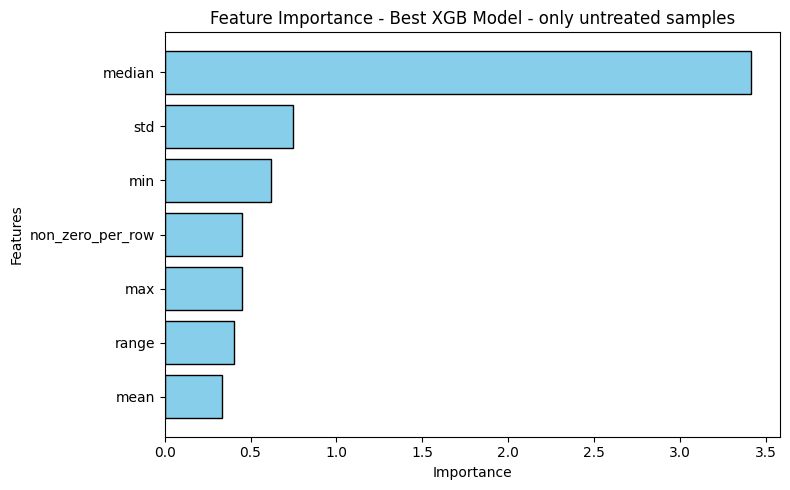

In [18]:
plt.figure(figsize=(8,5))
plt.barh(feat_importances["Feature"], feat_importances["Importance"], color="skyblue", edgecolor="black")
plt.title("Feature Importance - Best XGB Model - only untreated samples")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()